## Lab 8.2

Don't forget to push your lab notebook to your repo once you entered a quiz.

### Activity 1
Name: `growth-at4`

Finish by end of the lab

Exponential growth (for example of a population) can be modelled by the following equation

$$
u'(t) = \alpha u(t)
$$

where $a>0$ is a given constant. If the initial condition is given by  $u(0) = u_0$ the solution is given by $u(t) = u_0 e^{\alpha t}$. Since $a>0$ the solution becomes very large as $t$ increases. For a short time, such growth of a population may be realistic, but over a longer time, the growth of a population is restricted due to limitations of the environment. This can be descirbed by a _logistic growth term_:

$$
u'(t) = \alpha u(t)  \left ( 1-\frac{u(t)}{R}  \right )
$$

Solve this equation for $u_0 = 2$, $\alpha = 1$ and $R=100$ for $t\in[0,11]$. Make a plot of $u(t)$. What is $u(4)$. Enter the value rounded to one decimal in question `growth-at4`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

#ivp and odeint are the two main ways to solve odes, let's do it both ways!

differences between solve_ivp and odeint:
- solve_ivp:
 * doesn't allow extra arguments to pass to function - use lambda and def  RHS funcs
 * order of function is f(t, u)
 * input:
         fun: function, called as f(t,y)
         t_span: tuple, interval of integration
         y0: array, initial value
         method: integration method to use. runge-kutte 5(4) is default
         t_eval: array, times at which to store computed solution (t values for which y will be outputted) 
 * returns: 
         nfev: number of evaluations of right hand side
         njev: number of evaluations of Jacobian
         nlu: number of LU decompositions
         t: time points (t=t_eval if specified)
         y: values of solution at 't'
 
- odeint:
 * allows extra arguments - just need the one RHS function
 * order of function is f(u, t) (opposite of integrate.ode and solve_ivp)
     can switch order by setting tfirst='True'
 * input:
         func
         y0
         t
         args=(): additional arguments to pass to func
 * returns:
         y: array shape(len(t), len(y0)). Contains value of y for each t.
         infodict: dict with extra info, returned if full_output='True'
     

In [2]:
u0 = 2; a = 1; R = 100; 
t = (0,11) #t_range for integration
t_eval = np.linspace(0,11,12) # 'times at which to store computed solution,' otherwise uses different set for t

#it's pretty common to have this kind of format (def function that does the thing, and lambda function to call it with additional arguments)
 #for functions like solve_ivp that don't have a parameter for additional arguments

#derivative function (rhs):
def dudt(u,t,a, R):
    return a*u[0]*(1-u[0]/R)

dudt_ivp = lambda t,u: dudt(u,t,a,R)

#why does u0 have to be an array? - for vectorization
sol_rk45 = integrate.solve_ivp(dudt_ivp, t, [u0], t_eval=t_eval)

sol_ode = integrate.odeint(dudt, [u0], t_eval, args=(a,R))

print("full output from integrate.solve_ivp:")
print(sol_rk45)
#solution is in 'y' of the returned object
print("full output from integrate.odeint:")
print(sol_ode)

full output from integrate.solve_ivp:
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])
 t_events: None
        y: array([[ 2.        ,  5.25613459, 13.10587897, 29.0756534 , 52.76377441,
        75.21846097, 89.21091473, 95.74576507, 98.40863034, 99.4103065 ,
        99.77079102, 99.91521265]])
full output from integrate.odeint:
[[ 2.        ]
 [ 5.25593974]
 [13.10370412]
 [29.07343138]
 [52.70185964]
 [75.17896083]
 [89.16956511]
 [95.72288754]
 [98.38281579]
 [99.3989268 ]
 [99.77803442]
 [99.91822881]]


solve_ivp RK45 value for u(4) = 52.7638
odeint value for u(4) = 52.7019


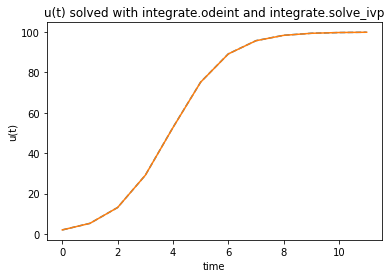

In [3]:
#plot graphs and get quiz answer
u_rk45 = np.ravel(sol_rk45.y)
u_ode = np.ravel(sol_ode)
plt.plot(t_eval, u_rk45, '--', label='solve_ivp RK45')
plt.plot(t_eval, u_ode, label='odeint')
plt.title('u(t) solved with integrate.odeint and integrate.solve_ivp')
plt.xlabel("time")
plt.ylabel("u(t)")

print('solve_ivp RK45 value for u(4) = {:.4f}'.format(u_rk45[4]))
print('odeint value for u(4) = {:.4f}'.format(u_ode[4]))

### Activity 2
Name: `skydiver-v7.5`,`skydiver-x`

Finish by Monday 9:30am. 



1. Solve the skydiver problem with the same initial height ($2000m$) and $k$ value as in class with the library `integrate.solve_ivp` and make a plot of velocity vs. time for $t \in [0,7.5]s$. Enter the velocity at $t=7.5s$ rounded to two decimal places into question `skydiver-v7.5`.
2. Add a height-dependent horizontal wind $v_\mathrm{x} = 0.1h \mathrm{Hz}$ where h is the height. Use the same air friction force as in the class notes (same $k$). Consider that the air friction force is due to the apparent wind in the horizontal direction. Make a plot of height vs. horizontal x position. Enter the horizontal position at $t=20s$ into question `skydiver-x`.

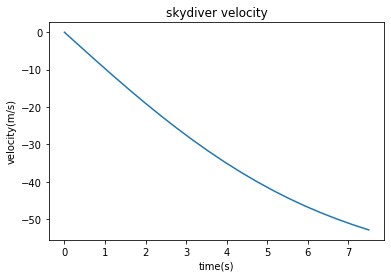

skydiver-v7.5: veolicty at t=7.5s: -52.92m/s


In [4]:
#its goddamn fucking 2000m not 2000m/s fucking hell fuCK
h0 = 2000 
k = 0.5*.3*1.225*1/80
t_eval = np.linspace(0,7.5,20)  
t = (0, 7.5)
g = 9.81

def rhs_sdiver_ivp(y,t,k,g):
    #y[0] = height, y[1]=velocity
    'Evaluate RHS for skydiver problem, advance one time step'
    #dhdt = v
    dhdt = y[1]
    #dvdt = -g + k*v**2
    dvdt = k*y[1]**2 - g
    return [dhdt,dvdt]

dvdt = lambda t,y: rhs_sdiver_ivp(y,t,k,g)
sol = integrate.solve_ivp(dvdt, t, [h0,0], t_eval=t_eval)

#solution is stored in sol.y
#velocity is in y[1]
v = np.ravel(sol.y[1])
#print(v, sol)
plt.plot(t_eval,v)
plt.xlabel('time(s)')
plt.ylabel('velocity(m/s)')
plt.title('skydiver velocity')
plt.show()

print("skydiver-v7.5: veolicty at t=7.5s: {:.2f}m/s".format(v[-1]))

#### Now add horizontal wind

2. Add a height-dependent horizontal wind $v_\mathrm{x} = 0.1h \mathrm{Hz}$ where h is the height. Use the same air friction force as in the class notes (same $k$). Consider that the air friction force is due to the apparent wind in the horizontal direction. Make a plot of height vs. horizontal x position. Enter the horizontal position at $t=20s$ into question `skydiver-x`.

The   expression for the drag force is 
$$F_D = \frac{1}{2} C_D \rho v^2 A ,$$ where $C_D \approx 0.3$ is the drag coefficient, $v$ velocity of object experiencing the drag, $\rho = 1.224 \mathrm{kg/m^3}$ the density of air the object is experiencing the drag in. $A$ is the cross-sectional area of the object, for a skydiver assume $A = 1 m^2$, and their weight is $80\mathrm{kg}$.

skydiver-x: x position at t=20s = 2768.766104


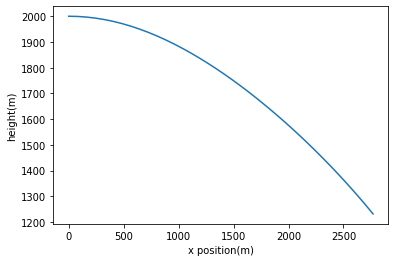

In [10]:
#parameters, same k and g from before
Cd = .3; rho=1.224; A=1; m=80
init_state = [2000, 0, 0, 0]
t_range = (0,20)
t_eval = np.linspace(0,20)

#want total velocity for drag
def rhs_sdiver_ivp2(diver,t,params):
    k,g,Cd,rho,A,m = params
    #diver[0] = height, diver[1]=y_velocity, diver[2]=xpos, diver[3]=xvelocity ()
    'Evaluate RHS for skydiver problem, advance one time step'
    #dhdt = v
    dhdt = diver[1]
    #dvdt = -g + k*v**2
    dvydt = k*diver[1]**2 - g
    #vx=dxdt= = .1*h
    dxdt = 0.1*diver[0]
    #ax=dvxdt= Fd/m
    #dvxdt = .5*Cd*rho*A*diver[3]**2 / m
    #want total velocity for drag
    # dvxdt = .5*Cd*rho*A*(diver[3]**2+diver[1]**2) / m
    # k = .5*Cd*rho*A/m
    dvxdt = k*(diver[3]**2 + diver[1]**2)
    return [dhdt,dvydt, dxdt, dvxdt]

params = (k,g,Cd,rho,A,m)
ivp2 = lambda t, diver: rhs_sdiver_ivp2(diver, t, params)

sol2 = integrate.solve_ivp(ivp2, t_range, init_state, t_eval=t_eval)


h = sol2.y[0]
x = sol2.y[2]
plt.plot(x,h)
plt.xlabel('x position(m)')
plt.ylabel('height(m)')
# print(x)
print('skydiver-x: x position at t=20s = %.6f' %x[-1])